In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
# Reads Raw Data
cafe_sales = pd.read_csv('/Users/Marcy_Student/Desktop/marcy/Mod1Project_Kevin/data/cleaned/cleanedCafeSalesPython.csv')
cafe_sales = cafe_sales.drop('Unnamed: 0', axis=1)
columns = cafe_sales.columns
numOfMissing =[]
for i in columns:
    numOfMissing.append(cafe_sales[i].str.contains('BLANK').sum())
missingValues = {
    'Column Name' : columns , 
    'Number of Missing Values' : numOfMissing
}
missing = pd.DataFrame(missingValues)

cafe_sales = cafe_sales[cafe_sales['Total Spent'] != 'BLANK']
cafe_sales['Total Spent'] = pd.to_numeric(cafe_sales['Total Spent'], errors='coerce')

#Remove blanks from transaction date
cafe_sales = cafe_sales[cafe_sales['Transaction Date'] != 'BLANK']
print(cafe_sales['Transaction Date'].str.contains('BLANK').sum())

# Convert 'Transaction Date' to datetime
cafe_sales['Transaction Date'] = pd.to_datetime(
    cafe_sales['Transaction Date'],
    format='%m/%d/%y',
    errors='coerce'
)
# Converts Month Day into actual Month Name, 9 would be September 
cafe_sales['Month'] = cafe_sales['Transaction Date'].dt.strftime('%B')
print(cafe_sales.groupby('Month')['Total Spent'].sum().sort_values(ascending=False))

# Group by month and sum of total spent
monthly_totals = cafe_sales.groupby('Month')['Total Spent'].sum()

# Define Months
months_order = ['January', 'February', 'March', 'April', 'May', 'June',
                'July', 'August', 'September', 'October', 'November', 'December']
monthly_totals = monthly_totals.reindex(months_order)

# Prepare data as dataframe
monthly_totals_df = monthly_totals.reset_index()

0
Month
June         7353.0
October      7314.0
January      7254.0
March        7216.0
April        7179.0
December     7177.0
August       7116.5
November     6969.0
May          6961.5
July         6877.5
September    6870.0
February     6644.0
Name: Total Spent, dtype: float64


['BLANK', 'Cake', 'Coffee', 'Cookie', 'Juice', 'Salad', 'Sandwich', 'Smoothie', 'Tea']
[4881.0, 9834.0, 7532.0, 3431.0, 10023.0, 18220.0, 13073.0, 12776.0, 5161.5]


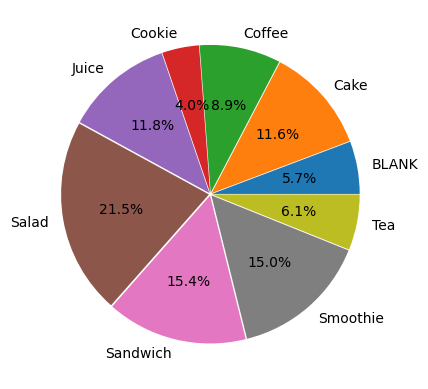

In [12]:
# CODE FOR PIE CHART
# SHOWS PERCENTAGE OF EACH ITEM SOLD
xpoints = cafe_sales['Item'].sort_values().unique().tolist()
ypoints = cafe_sales.groupby('Item')['Total Spent'].sum().tolist()
print(xpoints)
print(ypoints)
explode = [0.01, 0.01, 0.01, 0.01,0.01,0.01,0.01,0.01,0.01]
plt.pie(ypoints, labels=xpoints,explode=explode, autopct='%1.1f%%', )
plt.show() 

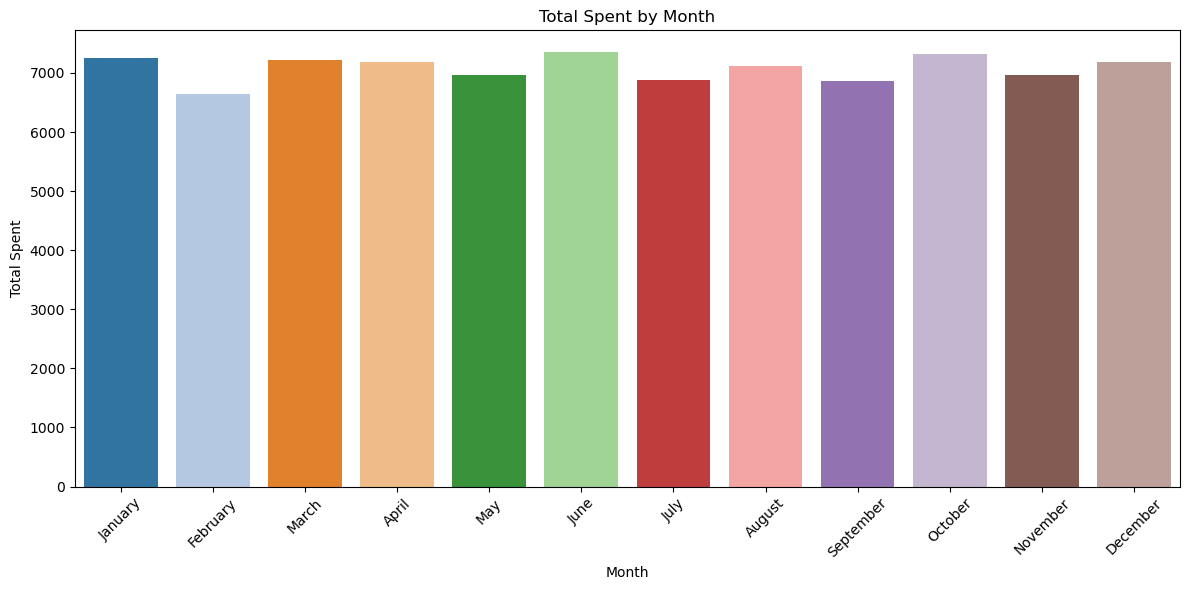

In [13]:
# CODE FOR BAR PLOT of Sum of Total Spent by Month
plt.figure(figsize=(12,6))
sns.barplot(x='Month', y='Total Spent', data=monthly_totals_df, hue = 'Month',palette='tab20')
plt.title('Total Spent by Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

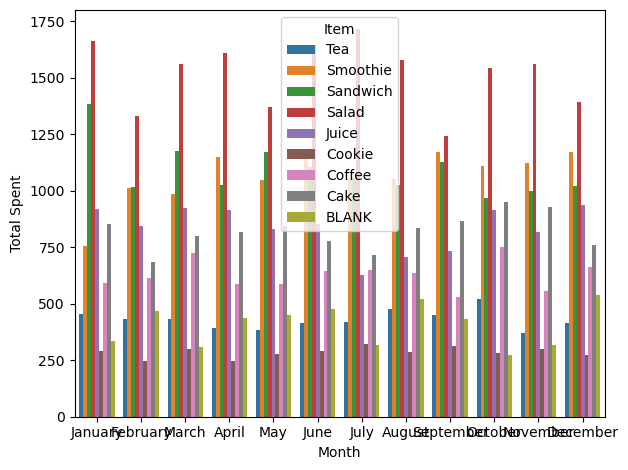

In [16]:
# CODE FOR BAR PLOT of Sum of Total Spent by Item in each month
monthly_ItemTotals = cafe_sales.groupby(['Month', 'Item'])['Total Spent'].sum().reset_index()
monthly_ItemTotals['Month'] = pd.Categorical(monthly_ItemTotals['Month'], categories=months_order, ordered=True)
monthly_ItemTotals = monthly_ItemTotals.sort_values('Month')
monthly_ItemTotals = monthly_ItemTotals.sort_values('Month')

sns.barplot(data=monthly_ItemTotals, x='Month', y = 'Total Spent', hue='Item')
plt.tight_layout()
plt.show()


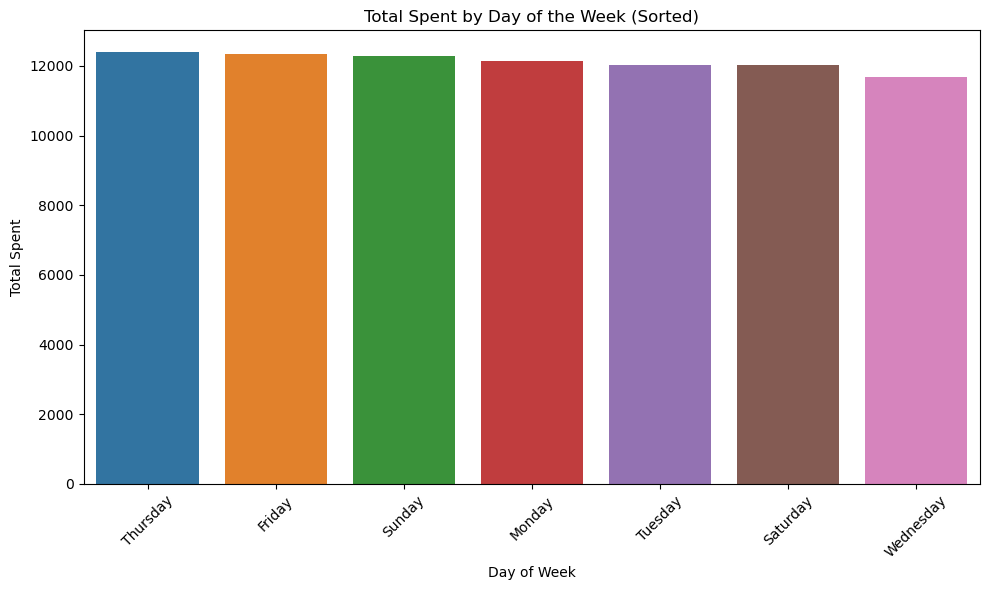

In [18]:
# Create new column Day of Week that stores the name of the day of the week
cafe_sales['Day Of Week'] = cafe_sales['Transaction Date'].dt.day_name()

# groupsby Day of the week and sum of total spent
day_totals = cafe_sales.groupby('Day Of Week')['Total Spent'].sum().reset_index()
# Orders the data from large to small
day_totals = day_totals.sort_values(by='Total Spent', ascending=False)

# Plots the Bar Graph, 
plt.figure(figsize=(10,6))
sns.barplot(data=day_totals, x='Day Of Week', y='Total Spent', hue = 'Day Of Week',  palette='tab10')

plt.title('Total Spent by Day of the Week (Sorted)')
plt.xlabel('Day of Week')
plt.ylabel('Total Spent')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()